In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras import Input
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import itertools

In [3]:
import os
train_image_files_path='C:/Users/ADMIN/Downloads/datanumber/filetrain'
valid_image_files_path='C:/Users/ADMIN/Downloads/datanumber/filevalid'

In [4]:
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
valid_data_gen = ImageDataGenerator(rescale=1/255)

In [6]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(48,48),
    class_mode='categorical'
)

valid_generator = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(48,48),
    class_mode='categorical'
)

Found 767 images belonging to 10 classes.
Found 167 images belonging to 10 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

#LopCNN1
model.add(Conv2D(4,(3,3), activation='relu',input_shape=(48,48,3)))
model.add(Dropout(0.1))
model.add(MaxPooling2D(2,2))
#LopCNN2
model.add(Conv2D(8,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#LopCNN3
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(80,activation=tf.nn.relu))

model.add(Dense(10, activation=tf.nn.softmax))

In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [9]:
EPOCHS=80
history=model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=EPOCHS,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=5
)

Epoch 1/80
20/20 [==============================] - 2s 48ms/step - loss: 2.2579 - acc: 0.2254 - val_loss: 2.2621 - val_acc: 0.2438
Epoch 2/80
20/20 [==============================] - 1s 37ms/step - loss: 1.9957 - acc: 0.3599 - val_loss: 2.0915 - val_acc: 0.2688
Epoch 3/80
20/20 [==============================] - 1s 37ms/step - loss: 1.6367 - acc: 0.4554 - val_loss: 1.8720 - val_acc: 0.3625
Epoch 4/80
20/20 [==============================] - 1s 42ms/step - loss: 1.3225 - acc: 0.5696 - val_loss: 1.5872 - val_acc: 0.5063
Epoch 5/80
20/20 [==============================] - 1s 39ms/step - loss: 1.0565 - acc: 0.6604 - val_loss: 1.3313 - val_acc: 0.5437
Epoch 6/80
20/20 [==============================] - 1s 37ms/step - loss: 0.8278 - acc: 0.7308 - val_loss: 1.1287 - val_acc: 0.6250
Epoch 7/80
20/20 [==============================] - 1s 39ms/step - loss: 0.6567 - acc: 0.7856 - val_loss: 0.9616 - val_acc: 0.7063
Epoch 8/80
20/20 [==============================] - 1s 35ms/step - loss: 0.5157 - a

In [10]:
model.save('model_IOT.h5')

1/1 [==============================] - 0s 28ms/step
Gia tri du doan: [1]
1/1 [==============================] - 0s 24ms/step
Gia tri du doan: [1]
1/1 [==============================] - 0s 27ms/step
Gia tri du doan: [5]
1/1 [==============================] - 0s 27ms/step
Gia tri du doan: [1]
1/1 [==============================] - 0s 26ms/step
Gia tri du doan: [3]


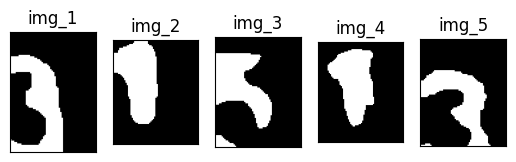

In [49]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imutils
from matplotlib import pyplot as plt
from flatten_json import flatten
from scipy.ndimage import median_filter
from datetime import datetime
import glob
import os

is_time_written = False
data_row = []
predicted_numbers_list = [] 

sd_card_path = 'E:/'
image_pattern = '*.jpg'
image_files = glob.glob(os.path.join(sd_card_path, image_pattern))
image_files.sort(key=os.path.getmtime)
latest_image_file = image_files[-1]
latest_image = cv.imread(latest_image_file, cv.IMREAD_GRAYSCALE)

# img_path = sd_card_path + image_file_name
# img_path='C:/Users/ADMIN/Downloads/17/picture3.jpg'
# img_gray = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

rotate = imutils.rotate(latest_image, 3)
cropped = rotate[95:182, 355:780]
brightness = 10 
contrast = 2.3 
image2 = cv.addWeighted(cropped, contrast, np.zeros(cropped.shape, rotate.dtype), 0, brightness)

cropped_image1 = image2[1:85, 0:60]
cropped_image2 = image2[1:85, 93:162]
cropped_image3 = image2[1:85, 180:245]
cropped_image4 = image2[1:85, 265:337]
cropped_image5 = image2[1:85, 350:417]

for i in range (5):
    if i == 0:
        img = cropped_image1
    elif i == 1:
        img = cropped_image2
    elif i == 2:
        img = cropped_image3
    elif i == 3:
        img = cropped_image4
    elif i == 4:
        img = cropped_image5
    img_blur = cv.blur(src=img, ksize=(3,3)) # Using the blur function to blur an image where ksize is the kernel size
    hist,bins = np.histogram(img_blur.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max())/cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0) .astype('uint8')
    img_his = cdf[img_blur]
        
    thresh, img_binary = cv.threshold(img_his, thresh=90, maxval=255, type=cv.THRESH_BINARY_INV)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv.erode(img_binary, kernel, iterations=1)
    resized_image = cv.resize(img_erosion, (48, 48))

    expanded_image = np.expand_dims(resized_image, axis=-1)
    expanded_image = np.repeat(expanded_image, 3, axis=-1)

    title = ['img_1', 'img_2', 'img_3', 'img_4', 'img_5']
    image = img_erosion
    plt.subplot(1, 5, i+1), plt.imshow(image, cmap = 'gray')
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])

# img=tf.keras.utils.load_img(img_path,target_size=(48,48))
    x=tf.keras.utils.img_to_array(expanded_image)
    x=np.expand_dims(x,axis=0)
    images= np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    predicted_numbers = np.argmax(y_predict, axis=1)
    print('Gia tri du doan:', predicted_numbers)
    data_row.append(str(predicted_numbers[0]))
    predicted_numbers_list.append(predicted_numbers[0])
    
if not is_time_written:  
    current_time = datetime.now()
    hour = current_time.hour
    minute = current_time.minute
    second = current_time.second
    day = current_time.day
    month = current_time.month
    year = current_time.year
    # data = np.column_stack((str(year)+'/'+str(month)+'/'+str(day)+'-'+str(hour)+':'+str(minute)+':'+str(second)+'='))
    data_row.insert(0, str(year)+'/'+str(month)+'/'+str(day)+'-'+str(hour)+':'+str(minute)+':'+str(second)+'=')
    with open('predictions.txt', 'a') as file:
            # Ghi dữ liệu vào tệp
            # np.savetxt(file, data, fmt='%s', newline='')
        file.write(' '.join(data_row))
        file.write('\n')
    is_time_written = True
        # delimiter=' total '
# with open('predictions.txt', 'a') as file:
#         # np.savetxt(file, predicted_numbers, fmt='%d ', newline='')
#     np.savetxt(file, predicted_numbers_list, fmt='%d ', delimiter=' ')
#     file.write('\n')
    